## Name: Rohit Kulkarni USC ID: 5402749044

In [ ]:
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
from keras.models import Sequential
import io
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

2.a)

In [2]:
(X_training, y_training), (X_testing, y_testing) = cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


In [ ]:
X = np.vstack((X_training,X_testing))
y = np.vstack((y_training,y_testing))

2.b)

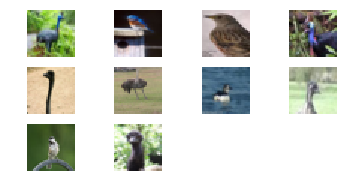

In [4]:
indexes = [m for m,n in enumerate(y) if n == 2]
X = X[indexes]
y = y[indexes]
for i in range(0,10):
    axis = plt.subplot(4,4,i+1)
    axis.imshow(X[i])
    plt.axis('off')
plt.show()

In [5]:
X.shape, y.shape

((6000, 32, 32, 3), (6000, 1))

2.c)

In [6]:
X = X.reshape((6144000,3))
X.shape

(6144000, 3)

2.d)

In [7]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans = kmeans.fit(X)
kmeans.cluster_centers_

array([[108.97036568, 108.60691289,  82.66458238],
       [206.53651167, 211.77549799, 211.39857871],
       [156.18468173, 155.51640472, 135.57285659],
       [ 49.02965771,  50.01208333,  38.57034319]])

In [ ]:
X_modified = X
for i in range(len(X)):
    X_modified[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

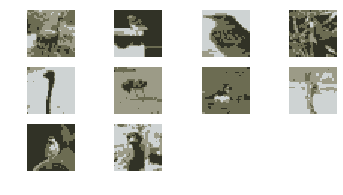

In [9]:
X_vizual = X_modified.reshape((6000,32,32,3))
for i in range(0,10):
    axis = plt.subplot(4,4,i+1)
    axis.imshow(X_vizual[i])
    plt.axis('off')
plt.show()

In [ ]:
y_resha = keras.utils.to_categorical(kmeans.labels_).reshape((6000,32,32,4))
X = X.reshape((6000,32,32,3))
X_resha = []
for i in range(len(X)):
    X_resha.append(rgb2grey(X[i]).tolist())
X_resha = np.array(X_resha)

2.e)

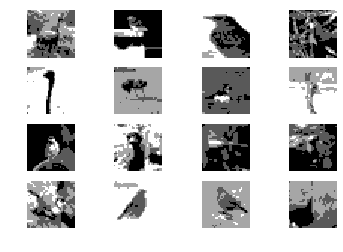

In [11]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    axis.imshow(X_resha[i],cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
X_resha = X_resha.reshape((6000,32,32,1))
X_training = X_resha[0:5984]
y_training = y_resha[0:5984]
X_testing = X_resha[-16:]
y_testing = y_resha[-16:]
X_training = np.vstack((X_training,X_testing))
y_training = np.vstack((y_training,y_testing))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resha, y_resha, test_size=0.1, random_state=10)

2.f)

In [41]:
c = Sequential()
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same', input_shape = (32,32,1)))
c.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Conv2D(64, kernel_size = (5,5), strides=(1, 1), padding='same'))
c.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
c.add(Dense(32, activation='softmax'))
c.add(Dense(4, activation='softmax'))
c.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dense_5 (Dense)              (None, 32, 32, 32)        2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32, 32, 4)         132       
Total params: 106,340
Trainable params: 106,340
Non-trainable params: 0
_________________________________________________________________


In [ ]:
c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
network = c.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=2)

Train on 5400 samples, validate on 600 samples
Epoch 1/20
 - 4s - loss: 1.1507 - acc: 0.6069 - val_loss: 0.9998 - val_acc: 0.7538
Epoch 2/20
 - 4s - loss: 0.9087 - acc: 0.7783 - val_loss: 0.8295 - val_acc: 0.7916
Epoch 3/20
 - 4s - loss: 0.7656 - acc: 0.8051 - val_loss: 0.7097 - val_acc: 0.8106
Epoch 4/20
 - 4s - loss: 0.6629 - acc: 0.8194 - val_loss: 0.6217 - val_acc: 0.8225
Epoch 5/20
 - 4s - loss: 0.5880 - acc: 0.8275 - val_loss: 0.5594 - val_acc: 0.8262
Epoch 6/20
 - 4s - loss: 0.5312 - acc: 0.8331 - val_loss: 0.5091 - val_acc: 0.8334
Epoch 7/20
 - 4s - loss: 0.4880 - acc: 0.8369 - val_loss: 0.4696 - val_acc: 0.8366
Epoch 8/20
 - 3s - loss: 0.4540 - acc: 0.8399 - val_loss: 0.4395 - val_acc: 0.8392
Epoch 9/20
 - 3s - loss: 0.4271 - acc: 0.8421 - val_loss: 0.4168 - val_acc: 0.8402
Epoch 10/20
 - 4s - loss: 0.4063 - acc: 0.8434 - val_loss: 0.3974 - val_acc: 0.8422
Epoch 11/20
 - 4s - loss: 0.3895 - acc: 0.8444 - val_loss: 0.3818 - val_acc: 0.8429
Epoch 12/20
 - 4s - loss: 0.3755 - acc

In [ ]:
pred = c.predict(X_test)
pred = pred.reshape(614400, 4)
output_images = []
for p in range(len(pred)):
    output_images.append([int(op) for op in kmeans.cluster_centers_[np.argmax(pred[p])]])
y_test_reshaped = y_test.reshape(614400, 4)
y_test_k_color = []
for p in range(len(y_test_reshaped)):
    y_test_k_color.append([int(op) for op in kmeans.cluster_centers_[np.argmax(y_test_reshaped[p])]])
output_images = np.reshape(output_images, (600, 32, 32, 3))
y_test_k_color = np.reshape(y_test_k_color, (600, 32, 32, 3))

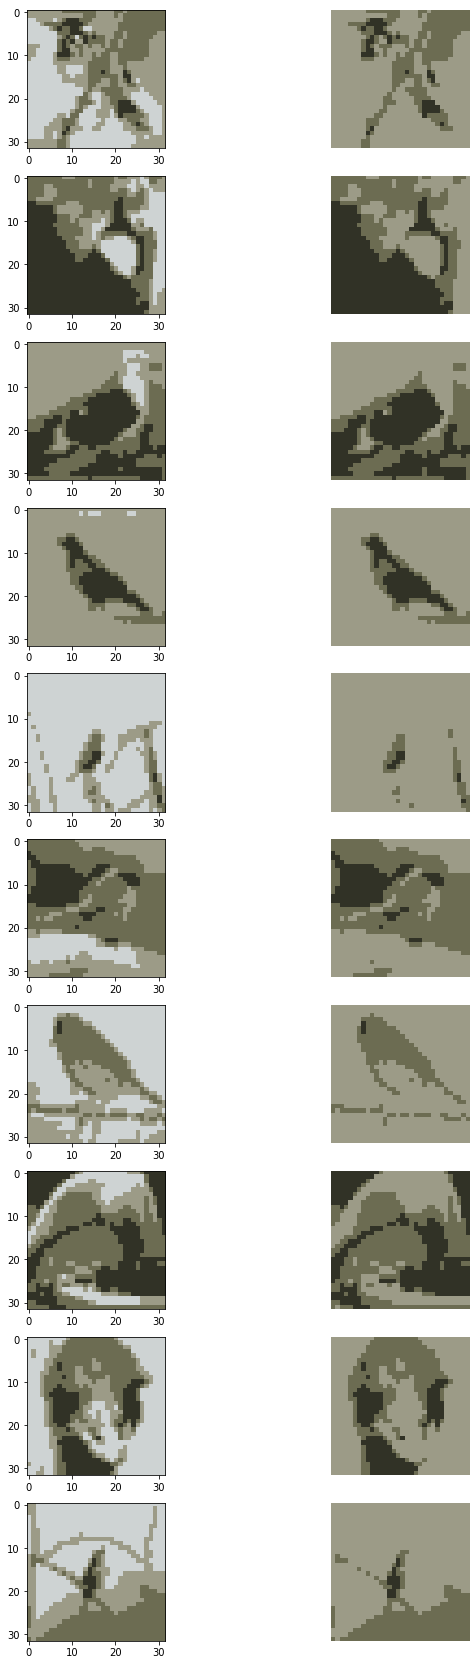

In [46]:
plt.figure(figsize=(10, 30))
subplotcount = 1
for i in range(0,10):
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(y_test_k_color[i])
    plt.subplot(10, 2, subplotcount)
    subplotcount+=1
    plt.imshow(output_images[i])
    plt.axis('off')
plt.show()

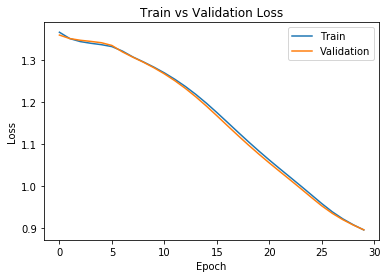

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()